In [1]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical

In [2]:
image_directory='datasets/'

In [3]:
no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')
dataset=[]
label=[]

Mri Images Contaning No Brain Tumor


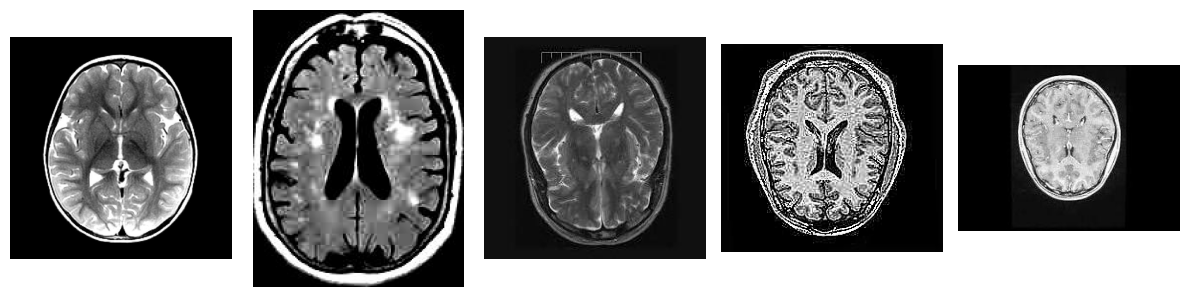

In [4]:
no_folder = os.path.join(image_directory, 'no')
yes_folder = os.path.join(image_directory, 'yes')

# Get the list of file names for 'no' and 'yes' folders
no_images = os.listdir(no_folder)[:5]  # Select the first 5 images
yes_images = os.listdir(yes_folder)[:5]  # Select the first 5 images

# Displaying 'no' images
plt.figure(figsize=(12, 6))
bold_text = "\033[1mMri Images Contaning No Brain Tumor\033[0m"
print(bold_text)
for i, image_name in enumerate(no_images):
    image_path = os.path.join(no_folder, image_name)
    img = Image.open(image_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()

Mri Images Containing Brain Tumor


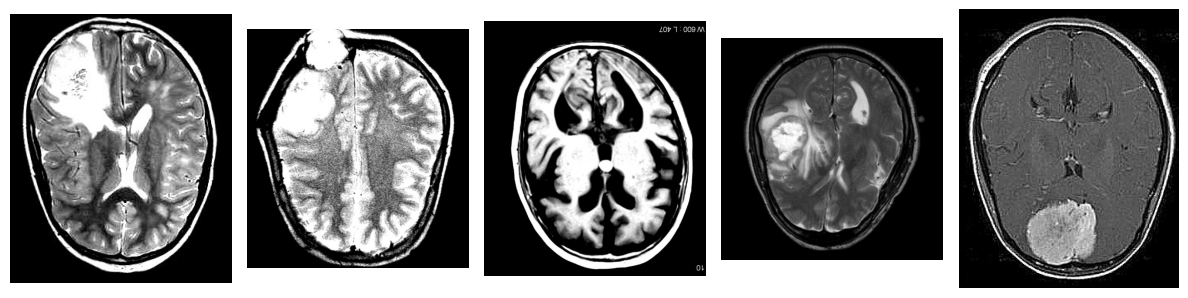

In [5]:
# Displaying 'yes' images
plt.figure(figsize=(12, 6))
bold_text = "\033[1mMri Images Containing Brain Tumor\033[0m"
print(bold_text)
for i, image_name in enumerate(yes_images):
    image_path = os.path.join(yes_folder, image_name)
    img = Image.open(image_path)
    plt.subplot(2, 5, i+6)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
INPUT_SIZE=64

In [7]:
for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [8]:
dataset=np.array(dataset)
label=np.array(label)

In [9]:
x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)

In [10]:
x_train=normalize(x_train, axis=1)
x_test=normalize(x_test, axis=1)

y_train=to_categorical(y_train , num_classes=2)
y_test=to_categorical(y_test , num_classes=2)

In [11]:
# Model Building
# 64,64,3

model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))


# Binary CrossEntropy= 1, sigmoid
# Categorical Cross Entryopy= 2 , softmax

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [12]:
# model.fit(x_train, y_train, 
# batch_size=16, 
# verbose=1, epochs=10, 
# validation_data=(x_test, y_test),
# shuffle=False)

# model.save('BrainTumor10EpochsCategorical.h5')

# loss, accuracy = model.evaluate(x_test, y_test)
# print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10


150/150 [==============================] - 3s 15ms/step - loss: 0.5350 - accuracy: 0.7317 - val_loss: 0.4120 - val_accuracy: 0.8150
Epoch 2/10
150/150 [==============================] - 2s 12ms/step - loss: 0.3725 - accuracy: 0.8446 - val_loss: 0.3416 - val_accuracy: 0.8400
Epoch 3/10
150/150 [==============================] - 2s 12ms/step - loss: 0.2858 - accuracy: 0.8800 - val_loss: 0.2343 - val_accuracy: 0.9033
Epoch 4/10
150/150 [==============================] - 2s 12ms/step - loss: 0.2027 - accuracy: 0.9233 - val_loss: 0.1762 - val_accuracy: 0.9433
Epoch 5/10
150/150 [==============================] - 2s 14ms/step - loss: 0.1310 - accuracy: 0.9558 - val_loss: 0.1360 - val_accuracy: 0.9567
Epoch 6/10
150/150 [==============================] - 2s 15ms/step - loss: 0.0965 - accuracy: 0.9704 - val_loss: 0.1173 - val_accuracy: 0.9533
Epoch 7/10
150/150 [==============================] - 2s 15ms/step - loss: 0.0676 - accuracy: 0.9771 - val_loss: 0.0964 - val_accuracy: 0.96

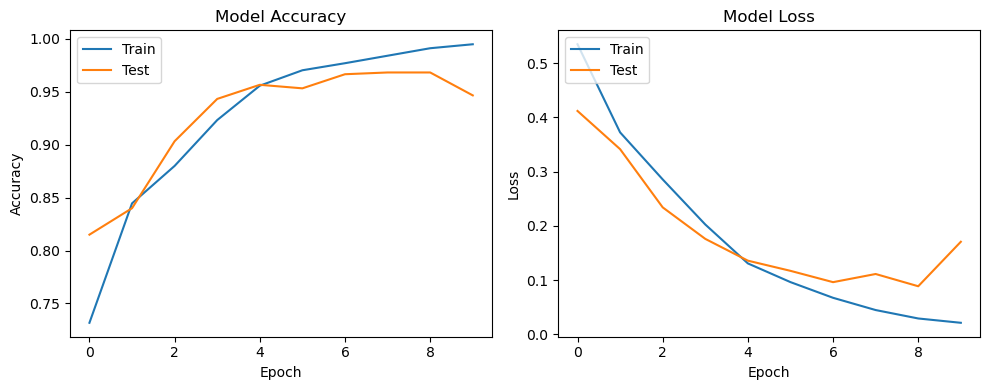

In [13]:
history = model.fit(
    x_train, y_train,
    batch_size=16,
    verbose=1,
    epochs=10,
    validation_data=(x_test, y_test),
    shuffle=False
)

# model.save('BrainTumor10EpochsCategorical.h5')

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(10, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [14]:
import cv2
from keras.models import load_model
from PIL import Image
import numpy as np

1/1 [==============================] - 0s 102ms/step
[1]
Brain Tumor Detected


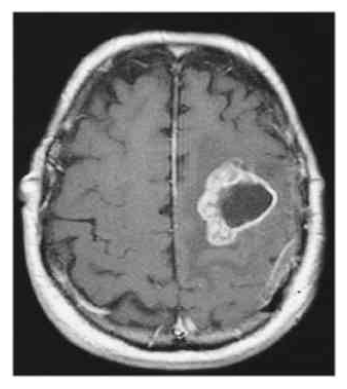

In [23]:
model=load_model('BrainTumor10EpochsCategorical.h5')

image=cv2.imread("C:\\Users\\vaibh\\Desktop\\test\\pred\\pred56.jpg")

img=Image.fromarray(image)

img=img.resize((64,64))

img=np.array(img)

input_img=np.expand_dims(img, axis=0)

# result=model.predict_classes(input_img)
plt.imshow(image)
plt.axis('off')

result = model.predict(input_img)

result_final=np.argmax(result,axis=1)

print(result_final)
if result_final == 0 :
    print("No Brain Tumor Detected")
else:
    print("Brain Tumor Detected")